# IBM HR Analytics — Employee Attrition & Performance

**Author:** Deepika Priya K

**Project Goal**

Perform **end-to-end HR Analytics** using:
* Exploratory Data Analysis (EDA)
* Visual Insights
* Machine Learning models (Logistic Regression, Random Forest, XGBoost)

**Main Objective:**
Identify **why employees leave** and build a **predictive model** to forecast attrition.

In [2]:
# 1. Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
# 2. Load Dataset
df = pd.read_csv("Original_HR-Employee-Attrition.csv")

print("Shape of Dataset:", df.shape)
print("\nData Types:\n")
print(df.dtypes)

Shape of Dataset: (1470, 35)

Data Types:

EmployeeNumber               int64
EmployeeCount                int64
Age                          int64
Gender                      object
MaritalStatus               object
Over18                      object
Department                  object
JobRole                     object
JobLevel                     int64
JobInvolvement               int64
JobSatisfaction              int64
TotalWorkingYears            int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
NumCompaniesWorked           int64
MonthlyIncome                int64
MonthlyRate                  int64
HourlyRate                   int64
DailyRate                    int64
PercentSalaryHike            int64
StockOptionLevel             int64
OverTime                    object
PerformanceRating            int64
EnvironmentSatisfaction      int64
WorkLifeBalance              int64
Relationship

In [4]:
# 3. Check Missing Values & Duplicates
print("\nMissing Values:\n")
print(df.isnull().sum().sort_values(ascending=False).head())

print("\nDuplicate EmployeeNumber:", df['EmployeeNumber'].duplicated().sum())


Missing Values:

EmployeeNumber    0
EmployeeCount     0
Age               0
Gender            0
MaritalStatus     0
dtype: int64

Duplicate EmployeeNumber: 0


**Insight :**


*   Dataset contains 1470 rows × 35 columns
*   Several categorical columns are object type


*   No missing values
*   No duplicate EmployeeNumber → employee ID is unique


Attrition
No     1233
Yes     237
Name: count, dtype: int64

 Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


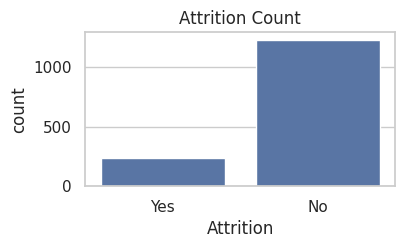

In [5]:
# 4. Attrition Distribution
print(df['Attrition'].value_counts())
print("\n",df['Attrition'].value_counts(normalize=True) * 100)

plt.figure(figsize=(4,2))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()

**Insight :**



*   Attrition Yes = 16%
*   Dataset is imbalanced (majority = No)


In [6]:
# 5. Key Numerical Columns Summary
df[['MonthlyIncome','DistanceFromHome','NumCompaniesWorked','YearsAtCompany']].describe()

,MonthlyIncome,DistanceFromHome,NumCompaniesWorked,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000
mean,6502.931293,9.192517,2.693197,7.008163
std,4707.956783,8.106864,2.498009,6.126525
min,1009.000000,1.000000,0.000000,0.000000
25%,2911.000000,2.000000,1.000000,3.000000
50%,4919.000000,7.000000,2.000000,5.000000
75%,8379.000000,14.000000,4.000000,9.000000
max,19999.000000,29.000000,9.000000,40.000000


**Insight :**

*   Salary varies from ₹1000 → ₹20,000
*   Most employees live 1–30 km from office

*   Majority worked 1–9 previous companies
*   Big range in YearsAtCompany (0 to 40) → many freshers and many highly experienced

# **Important Categorical Columns Summary**

In [7]:
# Job Role Distribution
df['JobRole'].value_counts()

,count
JobRole,
Sales Executive,326
Research Scientist,292
Laboratory Technician,259
Manufacturing Director,145
Healthcare Representative,131
Manager,102
Sales Representative,83
Research Director,80
Human Resources,52


**Insight :**


*   Sales Executive (326) highest count
*   Human Resources (52) lowest

In [8]:
# Overtime Distribution
df['OverTime'].value_counts()

,count
OverTime,
No,1054
Yes,416


**Insight :**


*   1054 say No OT
*   416 say Yes OT


Employees who work overtime are more likely to leave (proven later in visuals + ML).

In [9]:
# BusinessTravel Distribution
df['BusinessTravel'].value_counts()

,count
BusinessTravel,
Travel_Rarely,1043
Travel_Frequently,277
Non-Travel,150


In [10]:
# Department Distribution
df['Department'].value_counts()

,count
Department,
Research & Development,961
Sales,446
Human Resources,63


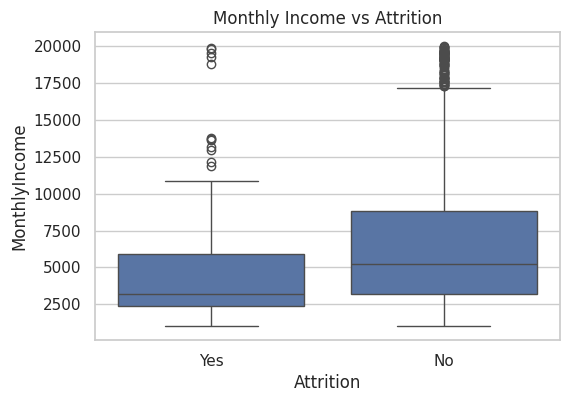

In [11]:
# Monthly Income vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition',y='MonthlyIncome',data=df)
plt.title('Monthly Income vs Attrition')
plt.show()

**Insight :**

*   Low salary employees leave more
*   Salary alone does not fully explain attrition

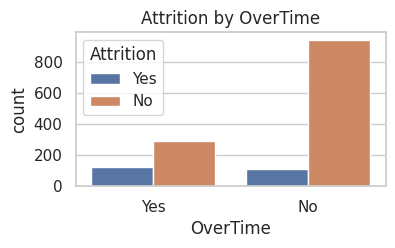

In [12]:
# Overtime vs Attrition
plt.figure(figsize=(4,2))
sns.countplot(x='OverTime',hue='Attrition',data=df)
plt.title('Attrition by OverTime')
plt.show()

**Insight :**

*   Overtime is one of the strongest attrition reasons
*   More OT → higher chance of leaving.

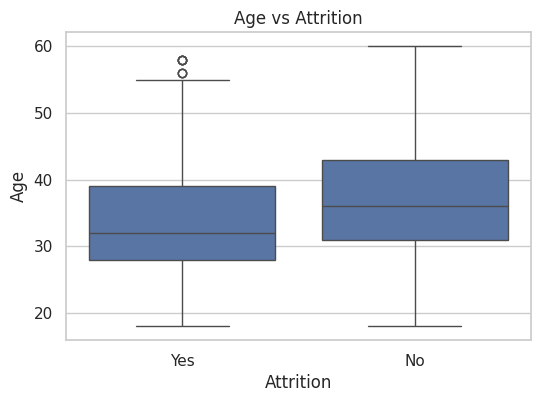

In [13]:
# Age vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition',y='Age',data=df)
plt.title('Age vs Attrition')
plt.show()

**Insight :**

* Most people who leave are young (25 – 35 years).

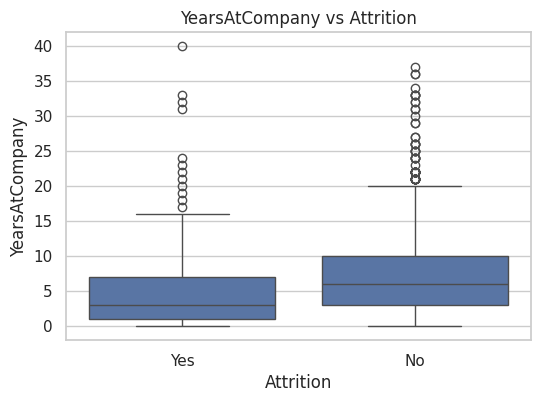

In [14]:
# Years at Company vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition',y='YearsAtCompany',data=df)
plt.title('YearsAtCompany vs Attrition')
plt.show()

**Insight :**

* Employees with fewer years at the company tend to leave more.

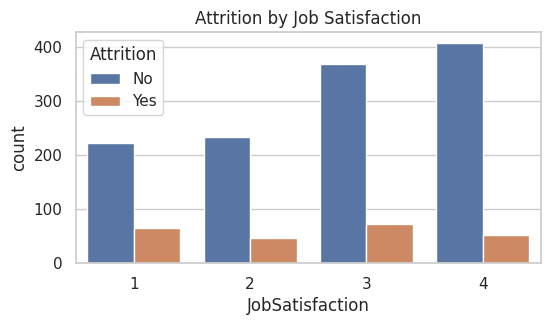

In [15]:
# Job Satisfaction vs Attrition
plt.figure(figsize=(6,3))
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df)
plt.title('Attrition by Job Satisfaction')
plt.show()

In [16]:
(df.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True).unstack() * 100)

Attrition,No,Yes
JobSatisfaction,,
1,77.162630,22.837370
2,83.571429,16.428571
3,83.484163,16.515837
4,88.671024,11.328976


**Insight :**
* Job satisfaction rating 1 has the highest % of attrition.

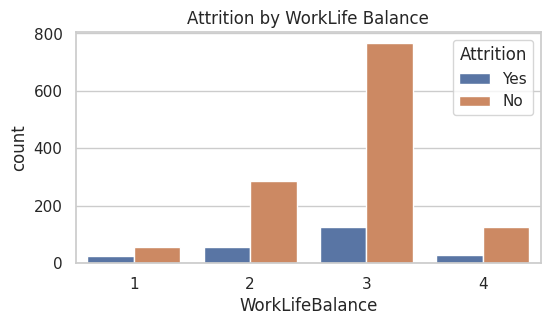

In [17]:
# Work Life Balance vs Attrition
plt.figure(figsize=(6,3))
sns.countplot(x='WorkLifeBalance',hue='Attrition',data=df)
plt.title('Attrition by WorkLife Balance')
plt.show()

In [18]:
df.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True).unstack() * 100

Attrition,No,Yes
WorkLifeBalance,,
1,68.750000,31.250000
2,83.139535,16.860465
3,85.778275,14.221725
4,82.352941,17.647059


**Insight :**
* Low work-life balance (rating 1 or 2) shows higher attrition %.

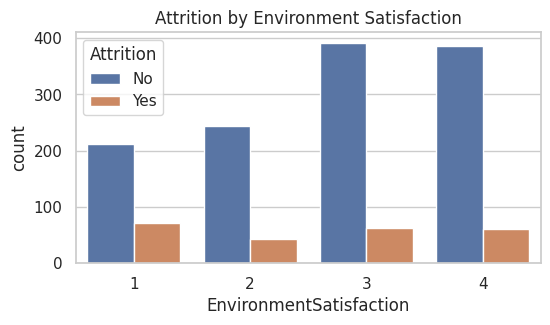

In [19]:
# Environment Satisfaction vs Attrition
plt.figure(figsize=(6,3))
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=df)
plt.title('Attrition by Environment Satisfaction')
plt.show()

In [20]:
df.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True).unstack()*100

Attrition,No,Yes
EnvironmentSatisfaction,,
1,74.647887,25.352113
2,85.017422,14.982578
3,86.313466,13.686534
4,86.547085,13.452915


**Insight :**
* Environment satisfaction rating 1 has more employees leaving.

In [21]:
# Convert Attrition Yes/No → 1/0
df['AttritionFlag'] = df['Attrition'].map({'Yes':1,'No':0})
df['AttritionFlag'].head(5)

,AttritionFlag
0,1
1,0
2,1
3,0
4,0


In [22]:
# Correlation Heatmap (Numeric Only)
numeric_df = df.select_dtypes(include = ['int64','float64'])
correlation = numeric_df.corr()
correlation

,EmployeeNumber,EmployeeCount,Age,JobLevel,JobInvolvement,JobSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,...,StockOptionLevel,PerformanceRating,EnvironmentSatisfaction,WorkLifeBalance,RelationshipSatisfaction,Education,TrainingTimesLastYear,DistanceFromHome,StandardHours,AttritionFlag
EmployeeNumber,1.000000,NaN,-0.010145,-0.018519,-0.006888,-0.046247,-0.014365,-0.011240,-0.008416,-0.009019,...,0.062227,-0.020359,0.017621,0.010309,-0.069861,0.042070,0.023603,0.032916,NaN,-0.010577
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,-0.010145,NaN,1.000000,0.509604,0.029820,-0.004892,0.680381,0.311309,0.212901,0.216513,...,0.037510,0.001904,0.010146,-0.021490,0.053535,0.208034,-0.019621,-0.001686,NaN,-0.159205
JobLevel,-0.018519,NaN,0.509604,1.000000,-0.012630,-0.001944,0.782208,0.534739,0.389447,0.353885,...,0.013984,-0.021222,0.001212,0.037818,0.021642,0.101589,-0.018191,0.005303,NaN,-0.169105
JobInvolvement,-0.006888,NaN,0.029820,-0.012630,1.000000,-0.021476,-0.005533,-0.021355,0.008717,-0.024184,...,0.021523,-0.029071,-0.008278,-0.014617,0.034297,0.042438,-0.015338,0.008783,NaN,-0.130016
JobSatisfaction,-0.046247,NaN,-0.004892,-0.001944,-0.021476,1.000000,-0.020185,-0.003803,-0.002305,-0.018214,...,0.010690,0.002297,-0.006784,-0.019459,-0.012454,-0.011296,-0.005779,-0.003669,NaN,-0.103481
TotalWorkingYears,-0.014365,NaN,0.680381,0.782208,-0.005533,-0.020185,1.000000,0.628133,0.460365,0.404858,...,0.010136,0.006744,-0.002693,0.001008,0.024054,0.148280,-0.035662,0.004628,NaN,-0.171063
YearsAtCompany,-0.011240,NaN,0.311309,0.534739,-0.021355,-0.003803,0.628133,1.000000,0.758754,0.618409,...,0.015058,0.003435,0.001458,0.012089,0.019367,0.069114,0.003569,0.009508,NaN,-0.134392
YearsInCurrentRole,-0.008416,NaN,0.212901,0.389447,0.008717,-0.002305,0.460365,0.758754,1.000000,0.548056,...,0.050818,0.034986,0.018007,0.049856,-0.015123,0.060236,-0.005738,0.018845,NaN,-0.160545
YearsSinceLastPromotion,-0.009019,NaN,0.216513,0.353885,-0.024184,-0.018214,0.404858,0.618409,0.548056,1.000000,...,0.014352,0.017896,0.016194,0.008941,0.033493,0.054254,-0.002067,0.010029,NaN,-0.033019


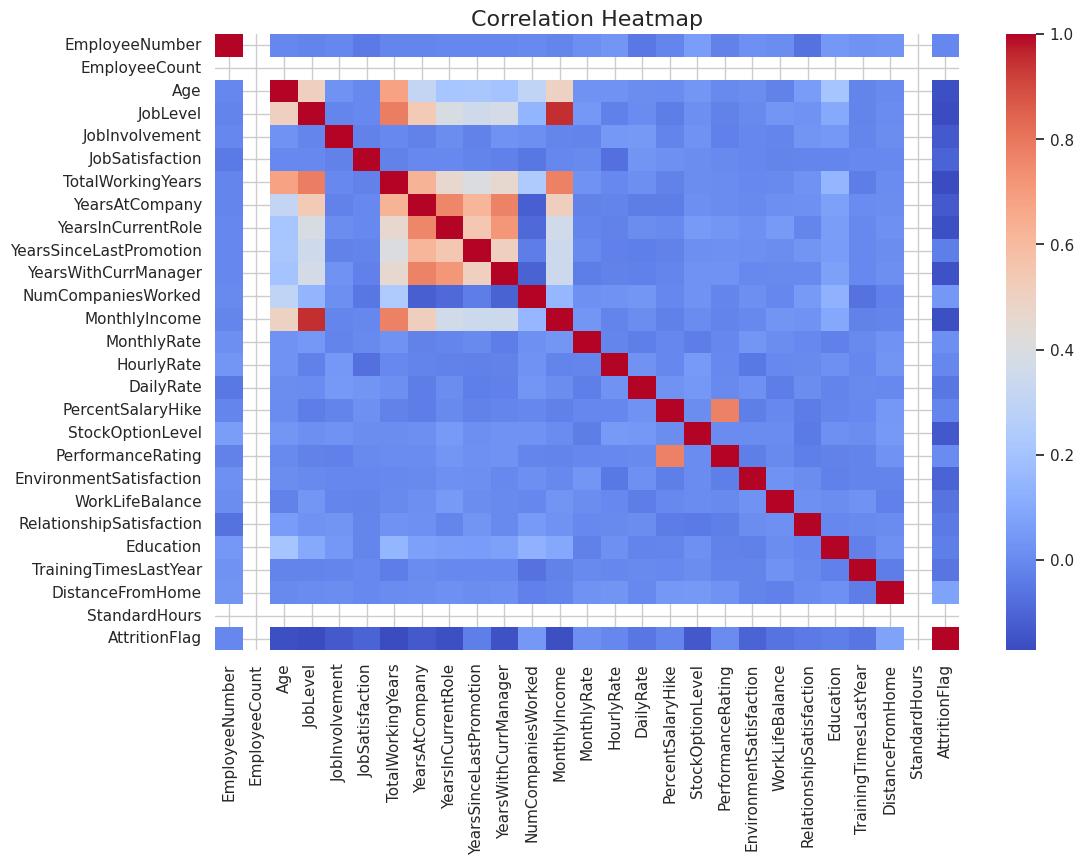

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=False,cmap='coolwarm')
plt.title('Correlation Heatmap',fontsize = 16)
plt.show()

The correlation heatmap shows that attrition cannot be explained by any one numeric feature.
Most numeric variables have weak correlation with Attrition.
Years-related and income-related fields show strong internal correlation but weak relation to attrition.
This means ML models (like XGBoost) need many features together to predict attrition accurately.

#**Data Preparation**

In [24]:
# Remove Useless Columns
df = df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber','Attrition'],axis=1)
df.head()

,Age,Gender,MaritalStatus,Department,JobRole,JobLevel,JobInvolvement,JobSatisfaction,TotalWorkingYears,YearsAtCompany,...,PerformanceRating,EnvironmentSatisfaction,WorkLifeBalance,RelationshipSatisfaction,Education,EducationField,TrainingTimesLastYear,DistanceFromHome,BusinessTravel,AttritionFlag
0,41,Female,Single,Sales,Sales Executive,2,3,4,8,6,...,3,2,1,1,2,Life Sciences,0,1,Travel_Rarely,1
1,49,Male,Married,Research & Development,Research Scientist,2,2,2,10,10,...,4,3,3,4,1,Life Sciences,3,8,Travel_Frequently,0
2,37,Male,Single,Research & Development,Laboratory Technician,1,2,3,7,0,...,3,4,3,2,2,Other,3,2,Travel_Rarely,1
3,33,Female,Married,Research & Development,Research Scientist,1,3,3,8,8,...,3,4,3,3,4,Life Sciences,3,3,Travel_Frequently,0
4,27,Male,Married,Research & Development,Laboratory Technician,1,3,2,6,2,...,3,1,3,4,1,Medical,3,2,Travel_Rarely,0


**Why remove these?**

* **EmployeeCount :** Same value for all rows → No information

* **StandardHours :** Same value for all rows

* **Over18 :** Always "Y" → No variance

* **EmployeeNumber :** Just an ID → Not useful for ML

* **Attrition :** Replaced with numerical AttritionFlag

In [25]:
# One-Hot Encode the Categorical Columns
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded.head()

,Age,JobLevel,JobInvolvement,JobSatisfaction,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NumCompaniesWorked,...,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,41,2,3,4,8,6,4,0,5,8,...,True,False,True,True,False,False,False,False,False,True
1,49,2,2,2,10,10,7,1,7,1,...,False,False,False,True,False,False,False,False,True,False
2,37,1,2,3,7,0,0,0,0,6,...,False,False,True,False,False,False,True,False,False,True
3,33,1,3,3,8,8,7,3,0,1,...,False,False,True,True,False,False,False,False,True,False
4,27,1,3,2,6,2,2,2,2,9,...,False,False,False,False,False,True,False,False,False,True


I used **get_dummies()** on the entire dataframe because it automatically encodes only the **categorical columns** while keeping **numeric columns unchanged**.

This ensures the dataset becomes fully numeric and ready for machine learning without manually selecting columns.

In [26]:
# Define X (features) and y (target)
X = df_encoded.drop('AttritionFlag',axis=1)
y = df_encoded['AttritionFlag']
print("X shape:", X.shape)
print("y shape:", y.shape)
print("\n",y.value_counts(normalize=True) * 100)

X shape: (1470, 44)
y shape: (1470,)

 AttritionFlag
0    83.877551
1    16.122449
Name: proportion, dtype: float64


In [27]:
df_encoded.columns

Index(['Age', 'JobLevel', 'JobInvolvement', 'JobSatisfaction',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'NumCompaniesWorked',
       'MonthlyIncome', 'MonthlyRate', 'HourlyRate', 'DailyRate',
       'PercentSalaryHike', 'StockOptionLevel', 'PerformanceRating',
       'EnvironmentSatisfaction', 'WorkLifeBalance',
       'RelationshipSatisfaction', 'Education', 'TrainingTimesLastYear',
       'DistanceFromHome', 'AttritionFlag', 'Gender_Male',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'Department_Research & Development', 'Department_Sales',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'OverTime_Yes', 'EducationField_Life Sciences',
       'EducationField_Marketing', 

**Data Cleaning Insights :**

* Several columns had no variation (Over18, StandardHours, EmployeeCount) → removed.

* EmployeeNumber is an identifier, so it was dropped.

* Converted the target variable into a numeric AttritionFlag (Yes=1, No=0).

* Used one-hot encoding to convert all categorical columns into machine-readable format.

# **Logistic Regression**

In [28]:
# 1. Train–Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)
print("Train:", X_train.shape, " Test:", X_test.shape)
print("\nTrain Target Distribution:\n", y_train.value_counts(normalize=True) * 100)
print("\nTest Target Distribution:\n", y_test.value_counts(normalize=True) * 100)

Train: (1102, 44)  Test: (368, 44)

Train Target Distribution:
 AttritionFlag
0    83.84755
1    16.15245
Name: proportion, dtype: float64

Test Target Distribution:
 AttritionFlag
0    83.967391
1    16.032609
Name: proportion, dtype: float64


In [29]:
# 2. Scale Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=['int64','float64']).columns

# Fit on training numerical columns only
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])

**transform()** just applies the scaler formula to test data so the value will get changed but it will not learn anything.

In [30]:
# numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
# print("Numeric cols:", numeric_cols)
# print("Train means:\n", X_train_scaled[numeric_cols].mean().round(3))
# print("Train stds:\n", X_train_scaled[numeric_cols].std().round(3))

In [31]:
# X_train_scaled.head(5)

In [32]:
# 3. Train Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report)

log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',   # important for imbalanced data
    random_state=42
)

log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [33]:
# 4. Predictions
y_pred = log_model.predict(X_test_scaled)
y_proba = log_model.predict_proba(X_test_scaled)[:, 1]

In [34]:
# 5. Evaluation Metrics
print("Accuracy  :", round(accuracy_score(y_test, y_pred), 4))
print("Precision :", round(precision_score(y_test, y_pred), 4))
print("Recall    :", round(recall_score(y_test, y_pred), 4))
print("F1-score  :", round(f1_score(y_test, y_pred), 4))
print("ROC AUC   :", round(roc_auc_score(y_test, y_proba), 4))
print("\nConfusion Matrix (rows=true, cols=predicted):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

Accuracy  : 0.7772
Precision : 0.3861
Recall    : 0.661
F1-score  : 0.4875
ROC AUC   : 0.8098

Confusion Matrix (rows=true, cols=predicted):
[[247  62]
 [ 20  39]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9251    0.7994    0.8576       309
           1     0.3861    0.6610    0.4875        59

    accuracy                         0.7772       368
   macro avg     0.6556    0.7302    0.6726       368
weighted avg     0.8387    0.7772    0.7983       368



In [35]:
# 6. Feature Importance (Logistic Coefficients)
coef = pd.Series(log_model.coef_[0], index=X_train_scaled.columns)
coef_sorted = coef.sort_values(key=lambda x: x.abs(), ascending=False)

print("\nTop 20 features by absolute coefficient va   lue:")
print(coef_sorted.head(20))


Top 20 features by absolute coefficient va   lue:
OverTime_Yes                         1.630355
JobRole_Laboratory Technician        1.591211
BusinessTravel_Travel_Frequently     1.541824
JobRole_Sales Representative         1.218634
JobRole_Research Director           -0.938723
MaritalStatus_Single                 0.926002
EducationField_Other                -0.900778
BusinessTravel_Travel_Rarely         0.797478
JobRole_Human Resources              0.760444
JobLevel                             0.594139
TotalWorkingYears                   -0.529005
YearsSinceLastPromotion              0.521625
EducationField_Life Sciences        -0.500195
NumCompaniesWorked                   0.471802
YearsWithCurrManager                -0.452453
Department_Research & Development   -0.443664
Department_Sales                     0.431240
EnvironmentSatisfaction             -0.404972
JobSatisfaction                     -0.393315
EducationField_Medical              -0.363420
dtype: float64


**Key Interpretation**

Logistic Regression is the best model for catching real attrition cases (highest recall),
but it is weaker at correctly predicting who will NOT leave (lower precision).

**Feature Coefficients Interpretation :**

**1. Positive Coefficients → Higher chance of Attrition**

Employees with:

* OverTime = Yes
* Sales roles
* Frequent travel
* Low job level
* Low stock options
* Recently joined

are more likely to leave.


**2. Negative Coefficients → Lower chance of Attrition**

Employees with:

* Higher salary

* Higher job satisfaction

* Stable manager relationship

* More working years

are less likely to leave.

# **Random Forest Classifier**

In [36]:
# Train Random Forest (Handles Non-Scaled Data)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=200,           # number of trees
    max_depth=None,             # allow full depth
    class_weight='balanced',    # handle imbalance
    random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [37]:
# Predictions
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

In [38]:
# Evaluation Metrics

print("Accuracy:",round(accuracy_score(y_test, rf_pred), 4))
print("Precision:", round(precision_score(y_test, rf_pred), 4))
print("Recall:", round(recall_score(y_test, rf_pred), 4))
print("F1-score:", round(f1_score(y_test, rf_pred), 4))
print("ROC-AUC:", round(roc_auc_score(y_test, rf_proba), 4))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,rf_pred))

print("\nClassification Report:")
print(classification_report(y_test,rf_pred,digits = 4))

Accuracy: 0.8424
Precision: 0.5556
Recall: 0.0847
F1-score: 0.1471
ROC-AUC: 0.7571

Confusion Matrix:
[[305   4]
 [ 54   5]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8496    0.9871    0.9132       309
           1     0.5556    0.0847    0.1471        59

    accuracy                         0.8424       368
   macro avg     0.7026    0.5359    0.5301       368
weighted avg     0.8024    0.8424    0.7903       368



**Key Interpretation**

**Random Forest has:**

* High accuracy (because most employees are “No”)
* Good precision
* VERY LOW recall → it fails to catch employees who leave
* Predicts mostly No Attrition

Conclusion: Random Forest is NOT suitable for imbalanced attrition prediction.

# **XGBoost**

In [39]:
# Import XGBoost
import xgboost as xgb

In [40]:
# Compute class weight for imbalance
pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])
print("pos_weight =", round(pos_weight, 4))

pos_weight = 5.191


In [41]:
# Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.05  ,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=pos_weight,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

### Why these XGBoost parameters?

- **n_estimators = 200**  
  More trees → better learning, 200 avoids overfitting.

- **learning_rate = 0.05**  
  Small, stable learning rate → reduces overfitting.

- **max_depth = 4**  
  Shallow trees → prevent capturing noise.

- **subsample = 0.8**  
  Uses 80% of rows → more robustness.

- **colsample_bytree = 0.8**  
  Uses 80% of features per tree → less overfitting.

- **scale_pos_weight = 5.19**  
  Balances the dataset (Attrition Yes = minority).  
  Helps increase recall for “Yes” cases.

- **eval_metric = 'logloss'**  
  Best metric for binary classification + probability prediction.

In [42]:
# Predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

In [43]:
# Metrics
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1-score:", round(f1_score(y_test, y_pred), 4))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 4))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

Accuracy: 0.837
Precision: 0.4898
Recall: 0.4068
F1-score: 0.4444
ROC-AUC: 0.7656

Confusion Matrix:
[[284  25]
 [ 35  24]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8903    0.9191    0.9045       309
           1     0.4898    0.4068    0.4444        59

    accuracy                         0.8370       368
   macro avg     0.6900    0.6629    0.6745       368
weighted avg     0.8261    0.8370    0.8307       368



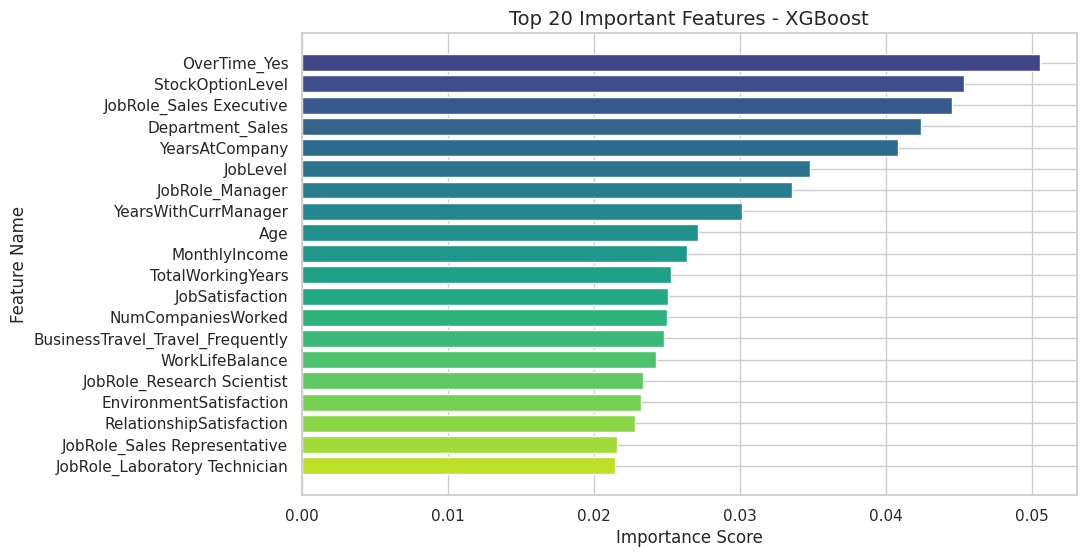

In [44]:
# Feature Importance (Top 20)
feature_importance = pd.Series(xgb_model.feature_importances_,index = X_train.columns).sort_values(ascending = False)

top_feat = feature_importance.head(20)

# Gradient colors
cmap = plt.cm.viridis
colors = cmap(np.linspace(0.2, 0.9, len(top_feat)))

plt.figure(figsize=(10,6))
plt.barh(top_feat.index,top_feat.values,color=colors)

plt.gca().invert_yaxis()
plt.title("Top 20 Important Features - XGBoost", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.show()

**Key Interpretation**

* XGBoost gives the best balance between precision and recall.
* It handles imbalanced data very well because we used scale_pos_weight.
* It learns non-linear patterns better than Logistic Regression.
* Better than Random Forest at detecting actual attrition cases
* Slightly lower recall than Logistic Regression, but much more stable


**XGBoost Feature Importance Interpretation**

**Top factors increasing attrition:**

* OverTime = Yes (strongest)

* Low Stock Option Level

* Sales Executive roles

* Department = Sales

* Few Years at Company

* Low Job Level

* Low Salary

* Low Job Satisfaction

* Low Environment Satisfaction

* Young Age

These match your EDA findings (great consistency).

# **Overall Comparison of all Three Models**

| Model                   | Accuracy | Precision (Yes) | Recall (Yes) | F1-score (Yes) | ROC-AUC |
| ----------------------- | -------- | --------------- | ------------ | -------------- | ------- |
| **Logistic Regression** | 0.777    | 0.386           | 0.661        | 0.487          | 0.809   |
| **Random Forest**       | 0.842    | 0.556           | 0.084        | 0.147          | 0.758   |
| **XGBoost**             | 0.837    | 0.489           | 0.406        | 0.444          | 0.766   |


**INTERPRETATION :**

**1. Accuracy**

* RF and XGBoost have high accuracy (~84%).

* BUT accuracy is misleading because the data is imbalanced (84% = “No”).

**2. Precision (When model says YES attrition, how many are truly Yes?)**

* Best: RF (55.6%)

* Meaning RF avoids many False Positives.

**3. Recall (Out of all real Yes, how many the model found?)**

* Best: Logistic Regression (66.1%)

* Logistic Regression finds more actual attrition cases.

**4. F1-score (Balance between precision & recall)**

* Best: XGBoost (0.444) → slightly better balance.

**5. ROC-AUC (How well model separates Yes & No)**

* Best: Logistic Regression (0.809)

# **Final Conclusion**

1. Logistic Regression is best for identifying employees who may leave (highest recall & ROC-AUC),
2. Random Forest is best for avoiding false positives (highest precision),
3. XGBoost gives the most balanced performance (best F1).

In [45]:
# Save Cleaned Dataset
df.to_csv('cleaned_ml_hr_dataset.csv',index=False)

In [46]:
# Split Data into 4 Tables (for SQL / Dashboard)

df_sql = pd.read_csv("Original_HR-Employee-Attrition.csv")

# 1️. Employee table
employee_data = df_sql[[
    'EmployeeNumber','Age','Gender','MaritalStatus','BusinessTravel',
    'Education','EducationField','Department','JobRole','TotalWorkingYears',
    'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
    'YearsWithCurrManager','NumCompaniesWorked','DistanceFromHome',
    'TrainingTimesLastYear'
]]

# 2️. Salary table
salary_data = df_sql[[
    'EmployeeNumber','JobLevel','MonthlyIncome','MonthlyRate','DailyRate',
    'HourlyRate','PercentSalaryHike','StockOptionLevel','PerformanceRating'
]]

# 3️. Satisfaction table
satisfaction_data = df_sql[[
    'EmployeeNumber','JobInvolvement','JobSatisfaction',
    'EnvironmentSatisfaction','WorkLifeBalance','RelationshipSatisfaction'
]]

# 4️. Attrition table
attrition_data = df_sql[[
    'EmployeeNumber','Attrition','OverTime'
]]

# Save all 4 as CSV for SQL / BI tools
employee_data.to_csv("employee_data.csv", index=False)
salary_data.to_csv("salary_data.csv", index=False)
satisfaction_data.to_csv("satisfaction_data.csv", index=False)
attrition_data.to_csv("attrition_data.csv", index=False)

print(employee_data.shape)
print(salary_data.shape)
print(satisfaction_data.shape)
print(attrition_data.shape)

(1470, 17)
(1470, 9)
(1470, 6)
(1470, 3)


# **Final Business Insights :**
**1. Overall Summary**
* Most employees do not leave (Attrition No = ~84%).
* Only a small portion leaves, but attrition clearly follows a pattern.
* Both EDA and ML help explain why people leave.

**2. EDA Insights (Visual Findings)**
1. Age
* Younger employees leave more (mostly 25–35 years).
* Older employees have lower attrition.
2. Monthly Income
* Employees earning below 5000 show highest attrition.
* Higher income → more stable.
3. Years at Company
* Employees with 1–3 years experience leave the most.
* Long-tenured employees rarely leave.
4. Overtime
* One of the strongest reasons for attrition.
* Working overtime consistently increases stress & burnout.
5. Job Satisfaction
* Low satisfaction employees (Rating 1 & 2) leave more.
* Higher satisfaction = lower attrition.
6. Work-Life Balance
* Poor work-life balance (Rating 1 or 2) strongly increases attrition.
7. Environment Satisfaction
* Employees who dislike their work environment leave more.
8. Department
* Sales department has the highest attrition.
* HR and R&D have much lower attrition.
9. Job Role
* Sales Executives leave the most.
* Managers leave the least (stable job roles).

**3. ML Insights (From Feature Importance)**

**Top 10 factors that increase attrition (XGBoost importance)**
* OverTime = Yes → #1 strongest driver
* StockOptionLevel (Low)
* JobRole = Sales Executive
* Department = Sales
* YearsAtCompany (Low)
* YearsWithCurrManager (Low)
* JobSatisfaction (Low)
* MonthlyIncome (Low)
* Age (Young employees)
* Environment Satisfaction (Low)

Machine Learning confirms the same patterns seen in EDA.

# **Final Business Recommendations**

**1. Reduce Overtime**
* Limit overtime hours
* Balance workload
* Provide comp-off

**2. Increase Salary for Low Bands**
* Review salary for employees below ₹5000
* Benchmark with industry salary levels

**3. Improve Work-Life Balance**
* Offer flexible timings
* Provide remote work options
* Reduce weekend work

**4. Support Sales Department**
* Sales team has the highest stress
* Improve incentives
* Provide training & support

**5. Improve Manager–Employee Relationship**
* New joiners with new managers leave more
* Train managers for better onboarding
* Increase 1-on-1 check-ins

**6. Improve Job Satisfaction**
* Ask employees for feedback
* Recognize good work
* Provide growth opportunities